# Australian postcodes location

Location of the postcodes of the "Solar home electricity" dataset,
using [Google Maps Geocoding API](https://developers.google.com/maps/documentation/geocoding/start).

The final output of this notebook is saved in `postcodes/postcodes.csv`.

PH May 2017

Using [requests](http://docs.python-requests.org/en/master/) package, "HTTP for Humans".

In [1]:
import requests

In [92]:
apikey_file = 'postcodes/GMaps_geocoding_key.txt'
def apikey():
    with open(apikey_file) as f:
        return f.readline().strip()
#apikey()

The post codes to analyze

In [3]:
pcodes = [2008, 2010, 2018, 2021, 2025, 2026, 2029, 2031, 2034, 2037, 2039, 2041, 2044, 2046, 2047, 2048, 2066, 2074, 2076, 2077, 2079, 2081, 2082, 2084, 2085, 2086, 2087, 2088, 2092, 2093, 2096, 2099, 2100, 2111, 2119, 2120, 2126, 2134, 2135, 2137, 2154, 2159, 2162, 2190, 2196, 2198, 2200, 2203, 2204, 2205, 2207, 2208, 2209, 2211, 2216, 2218, 2219, 2220, 2224, 2227, 2228, 2229, 2230, 2231, 2233, 2250, 2251, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2278, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2300, 2303, 2305, 2315, 2320, 2321, 2324, 2325, 2326, 2330]

## 1) API test with one postcode

Constant parameters:

In [4]:
geo_url = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {
    'key': apikey(), 
    'new_forward_geocoder': 'true'   
}

Forge the request with test postcode:

In [93]:
params['address'] = '2007, NSW, Australia'
r = requests.get(geo_url, params=params)

Check response:

In [94]:
r

<Response [200]>

In [7]:
r.status_code

200

In [8]:
r.ok

True

In [10]:
print(r.text)

{
   "results" : [
      {
         "address_components" : [
            {
               "long_name" : "2007",
               "short_name" : "2007",
               "types" : [ "postal_code" ]
            },
            {
               "long_name" : "Ultimo",
               "short_name" : "Ultimo",
               "types" : [ "locality", "political" ]
            },
            {
               "long_name" : "Council of the City of Sydney",
               "short_name" : "Sydney",
               "types" : [ "administrative_area_level_2", "political" ]
            },
            {
               "long_name" : "New South Wales",
               "short_name" : "NSW",
               "types" : [ "administrative_area_level_1", "political" ]
            },
            {
               "long_name" : "Australia",
               "short_name" : "AU",
               "types" : [ "country", "political" ]
            }
         ],
         "formatted_address" : "Ultimo NSW 2007, Australia",
         "g

### Parse response

In [11]:
r.json()

{'results': [{'address_components': [{'long_name': '2007',
     'short_name': '2007',
     'types': ['postal_code']},
    {'long_name': 'Ultimo',
     'short_name': 'Ultimo',
     'types': ['locality', 'political']},
    {'long_name': 'Council of the City of Sydney',
     'short_name': 'Sydney',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'New South Wales',
     'short_name': 'NSW',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'Australia',
     'short_name': 'AU',
     'types': ['country', 'political']}],
   'formatted_address': 'Ultimo NSW 2007, Australia',
   'geometry': {'bounds': {'northeast': {'lat': -33.8745248,
      'lng': 151.2029088},
     'southwest': {'lat': -33.8844359, 'lng': 151.1939931}},
    'location': {'lat': -33.8823187, 'lng': 151.197131},
    'location_type': 'APPROXIMATE',
    'viewport': {'northeast': {'lat': -33.8745248, 'lng': 151.2029088},
     'southwest': {'lat': -33.8844359, 'lng': 151.19

In [12]:
r.json()['status']

'OK'

In [13]:
len(r.json()['results'])

1

In [14]:
r.json()['results'][0]['geometry']['bounds']

{'northeast': {'lat': -33.8745248, 'lng': 151.2029088},
 'southwest': {'lat': -33.8844359, 'lng': 151.1939931}}

## 2) Get  all postcodes

Function for one postcode

In [15]:
def geo_postcode(c):
    '''Geocodes postcode `c` in Australia NSW.
    
    Returns a dict with 'location', 'bounds', and also the complete json response
    '''
    addr = '{:d}, NSW, Australia'.format(c)
    print('Geocoding {}...'.format(addr))
    params = {
        'key': apikey(), 
        'new_forward_geocoder': 'true',
        'address': addr
    }
    r = requests.get(geo_url, params=params)
    
    out = {
        'http_code': r.status_code
    }
    
    if not r.ok:
        print('request for postcode {:d} not successful: {}'.format(c, str(r)))
        return out
    
    try:
        json = r.json()
        out['json'] = json
    except Error:
        print('unable to decode json response for postcode {:d}: {}'.format(c, r.text))
        return out
    
    out['geoapi status'] = json['status']
    
    nres = len(json['results'])
    out['nres'] = nres
    
    if nres ==  0:
        print('warning: zero result for postcode {:d}'.format(c))
    else:
        if nres>1:
            print('warning: more than one result for postcode {:d}'.format(c))
        geom = json['results'][0]['geometry']
        bounds = geom ['bounds']
        out['bounds'] = bounds
        out['location'] = (geom['location']['lat'], geom['location']['lng'])
    
    return out

geo_postcode(2007)

Geocoding 2007, NSW, Australia...


{'bounds': {'northeast': {'lat': -33.8745248, 'lng': 151.2029088},
  'southwest': {'lat': -33.8844359, 'lng': 151.1939931}},
 'geoapi status': 'OK',
 'http_code': 200,
 'json': {'results': [{'address_components': [{'long_name': '2007',
      'short_name': '2007',
      'types': ['postal_code']},
     {'long_name': 'Ultimo',
      'short_name': 'Ultimo',
      'types': ['locality', 'political']},
     {'long_name': 'Council of the City of Sydney',
      'short_name': 'Sydney',
      'types': ['administrative_area_level_2', 'political']},
     {'long_name': 'New South Wales',
      'short_name': 'NSW',
      'types': ['administrative_area_level_1', 'political']},
     {'long_name': 'Australia',
      'short_name': 'AU',
      'types': ['country', 'political']}],
    'formatted_address': 'Ultimo NSW 2007, Australia',
    'geometry': {'bounds': {'northeast': {'lat': -33.8745248,
       'lng': 151.2029088},
      'southwest': {'lat': -33.8844359, 'lng': 151.1939931}},
     'location': {'lat

### Get all postcodes

with a bit of throttling to respect the API [usage limits](https://developers.google.com/maps/documentation/geocoding/usage-limits): 50 calls/s

In [16]:
import time

In [17]:
loc = {}

#for c in pcodes:
#    loc[c] = geo_postcode(c)
#    time.sleep(1/50)

#### Save the data for offline usage.

In [18]:
import json

In [19]:
#with open('postcodes.json', 'w') as f:
#    json.dump(loc, f, indent=1)

#### Reload saved data

Caveat about reloading json file: the keys (postcodes) which were ints are now strings. In fact json only supports string keys, cf. [Stack Overflow](http://stackoverflow.com/questions/1450957/pythons-json-module-converts-int-dictionary-keys-to-strings)

In [20]:
with open('postcodes.json') as f:
    loc = json.load(f)

loc_2 = {}
for k in loc:
    loc_2[int(k)] = loc[k]

loc = loc_2 

Example output

In [21]:
loc[2330]

{'bounds': {'northeast': {'lat': -32.1389092, 'lng': 151.4889105},
  'southwest': {'lat': -33.162648, 'lng': 150.3050814}},
 'geoapi status': 'OK',
 'http_code': 200,
 'json': {'results': [{'address_components': [{'long_name': '2330',
      'short_name': '2330',
      'types': ['postal_code']},
     {'long_name': 'New South Wales',
      'short_name': 'NSW',
      'types': ['administrative_area_level_1', 'political']},
     {'long_name': 'Australia',
      'short_name': 'AU',
      'types': ['country', 'political']}],
    'formatted_address': 'New South Wales 2330, Australia',
    'geometry': {'bounds': {'northeast': {'lat': -32.1389092,
       'lng': 151.4889105},
      'southwest': {'lat': -33.162648, 'lng': 150.3050814}},
     'location': {'lat': -32.7319195, 'lng': 150.8609358},
     'location_type': 'APPROXIMATE',
     'viewport': {'northeast': {'lat': -32.1389092, 'lng': 151.4889105},
      'southwest': {'lat': -33.162648, 'lng': 150.3050814}}},
    'place_id': 'ChIJY02e3iWVDGsRQ

Quality check on all postcodes

In [22]:
for c in pcodes:
    assert loc[c]['geoapi status'] == 'OK'
    assert loc[c]['nres'] == 1

## 3) Analyze locations

In [23]:
import numpy as np

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

Collect locations in a (postcode × lat_lng) array

In [25]:
location = [loc[c]['location'] for c in pcodes]
location = np.array(location)
location

array([[ -33.8878872,  151.1964025],
       [ -33.8825595,  151.2131584],
       [ -33.9219899,  151.20733  ],
       [ -33.8921203,  151.2306446],
       [ -33.8865002,  151.2437606],
       [ -33.8922511,  151.2714535],
       [ -33.8754209,  151.265623 ],
       [ -33.9122447,  151.2393885],
       [ -33.9236193,  151.2539627],
       [ -33.8802599,  151.1840188],
       [ -33.8661553,  151.1738213],
       [ -33.8583166,  151.1781916],
       [ -33.921824 ,  151.1665377],
       [ -33.8566687,  151.1315813],
       [ -33.8523805,  151.1548847],
       [ -33.8920561,  151.165081 ],
       [ -33.8126017,  151.1694511],
       [ -33.6867425,  151.1577979],
       [ -33.7085861,  151.1228434],
       [ -33.6924088,  151.0995447],
       [ -33.6709087,  151.125756 ],
       [ -33.5769126,  151.1694511],
       [ -33.5988104,  151.134494 ],
       [ -33.6363689,  151.2219013],
       [ -33.7293236,  151.2044159],
       [ -33.7473073,  151.2248157],
       [ -33.773259 ,  151.2160726],
 

### Mapping the locations

In [26]:
import cartopy.crs as ccrs

#### Select map projection

http://scitools.org.uk/cartopy/docs/latest/crs/projections.html

Plate carrée/equirectangular:

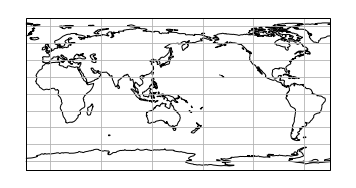

In [46]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=151))
ax.gridlines()
ax.coastlines();

Mercator. Nice property: conformal (preserve the shape of small objects)

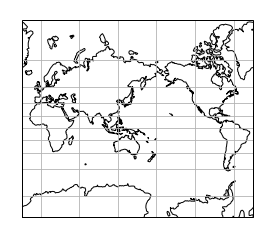

In [45]:
ax = plt.axes(projection=ccrs.Mercator(central_longitude=151))
ax.gridlines()
ax.coastlines();

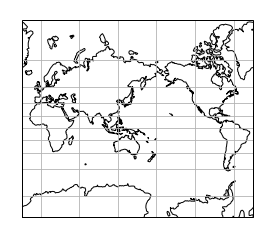

In [44]:
ax = plt.axes(projection=ccrs.Mercator(central_longitude=151, latitude_true_scale=-50))
ax.gridlines()
ax.coastlines();

Orthographic: nice globe projection effect, but incompatible with x/yticks (cf below)

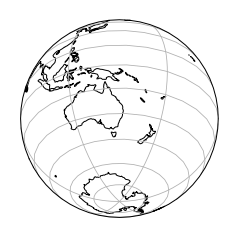

In [42]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=151, central_latitude=-33))
ax.gridlines()
ax.coastlines();

#### Plotting lands

from Natural Earth dataset (public domain)

http://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html

In [27]:
import cartopy.feature as cfeature

Low resolution: "110m"

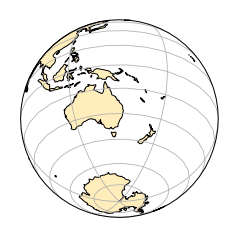

In [29]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=151, central_latitude=-33))
ax.gridlines()

land = cfeature.NaturalEarthFeature('physical', 'land', '110m', facecolor='#FFEEBB', edgecolor='black')
ax.add_feature(land);

High resolution: "10m"

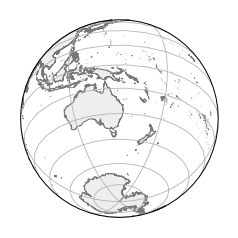

In [31]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=151, central_latitude=-33))
ax.gridlines()

land = cfeature.NaturalEarthFeature('physical', 'land', '10m', facecolor='#EEEEEE', edgecolor='#777777')
ax.add_feature(land);

####  Nearby cities, for a bit of context

In [32]:
cities = {
    'Newcastle': (-32.933, 151.733),
    'Gosford': (-33.433, 151.33),
    'Sidney':  (-33.856, 151.1925),
    #'Wollongong': (-34.417, 150.883),
    #'Nowra-Bomaderry': (-34.883, 150.6)
}

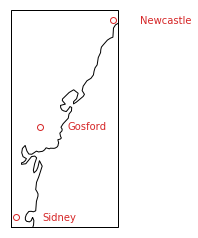

In [33]:
proj = ccrs.Mercator(central_longitude=151, latitude_true_scale=-50)

ax = plt.axes(projection=proj)
ax.coastlines('10m')

def plot_cities(ax):
    for cit in cities:
        lat, lng = cities[cit]
        ax.plot(lng, lat, 'o',transform=ccrs.Geodetic(), color='tab:red', fillstyle='none');

        ax.text(lng + 0.15, lat, cit,
             horizontalalignment='left', verticalalignment='center',
             color='tab:red',
             transform=ccrs.Geodetic())

plot_cities(ax)

#### Add a scale reference (length in km) 

Inspireed by Wikipedia's section [Great-circle distance/Radius for spherical Earth](https://en.wikipedia.org/wiki/Great-circle_distance#Radius_for_spherical_Earth).

A different code for scale bar: http://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot (but using UTM, so is it applicable to the Mercator map??)

In [34]:
def scale_square(ax, length, lng0, lat0):
    'scale square'
    R = 6371
    
    cos_lat = np.cos(np.deg2rad(lat0))
    d_lng = np.rad2deg(30/(R*cos_lat))
    d_lat = np.rad2deg(30/R)
    
    lng = [lng0-d_lng, lng0, lng0]
    lat = [lat0, lat0, lat0+d_lat]

    ax.plot(lng, lat, '-',transform=ccrs.Geodetic(), color='black', lw=3)
    ax.text(lng0-d_lng/2, lat0+d_lat/2, '{:.0f} km'.format(length), transform=ccrs.Geodetic(),
           horizontalalignment='center', verticalalignment='center')

#### Map of postcode locations

Ref about grid and ticks: http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

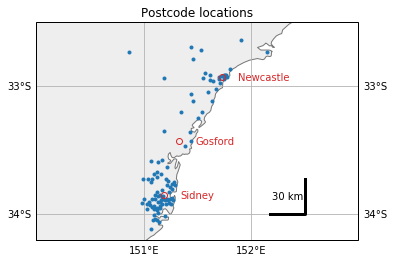

In [36]:
#proj = ccrs.Orthographic(central_longitude=151-60, central_latitude=-33) # cannot label gridlines
proj = ccrs.Mercator(central_longitude=151, latitude_true_scale=-50)

ax = plt.axes(projection=proj)

ax.add_feature(land)


lat, lng = location.T
ax.plot(lng, lat, '.', transform=ccrs.Geodetic());

ax.set(xlabel='lng', ylabel='lat', title='Postcode locations');

plot_cities(ax)

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(draw_labels=True)
gl.xlocator.set_params(nbins=2)
gl.xlabels_top = False
#gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


ax.set_extent([150, 153, -34.2, -32.5])

scale_square(ax, 30, 152.5, -34)
#plt.savefig('postcode_locations.png', dpi=150)

### Bounds of post codes areas

Drawing boxes with [matplotlib.patches.Rectangle](http://matplotlib.org/api/patches_api.html#matplotlib.patches.Rectangle) doesn't seem to work.

Using instead `shapely.geometry ` works (http://stackoverflow.com/questions/13856123/setting-up-a-map-which-crosses-the-dateline-in-cartopy)

In [37]:
import shapely.geometry as sgeom
#from matplotlib.patches import Rectangle

In [38]:
loc[2330]['bounds']

{'northeast': {'lat': -32.1389092, 'lng': 151.4889105},
 'southwest': {'lat': -33.162648, 'lng': 150.3050814}}

Create the dict of rectangles

In [39]:
rects = {}
for c in pcodes:
    bounds = loc[c]['bounds'] 
    sw = bounds['southwest']['lng'], bounds['southwest']['lat']
    ne = bounds['northeast']['lng'], bounds['northeast']['lat']
    rects[c] = sgeom.box(minx=sw[0], maxx=ne[0], miny=sw[1], maxy=ne[1])#Rectangle(sw, ne[0]-sw[0], ne[1]-sw[1], fill=True, color='b')

sw[0], ne[0], sw[1], ne[1]

(150.3050814, 151.4889105, -33.162648, -32.1389092)

In [40]:
r = rects[2330]
r.bounds

(150.3050814, -33.162648, 151.4889105, -32.1389092)

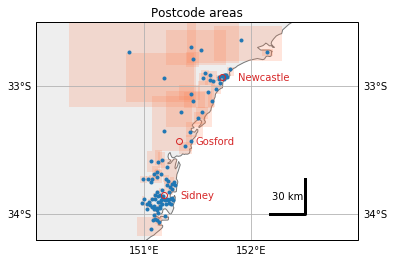

In [41]:
proj = ccrs.Mercator(central_longitude=151, latitude_true_scale=-50)

#box = sgeom.box(minx=100, maxx=160, miny=-50, maxy=-10)

ax = plt.axes(projection=proj)

ax.add_feature(land)

lat, lng = location.T
ax.plot(lng, lat, '.', transform=ccrs.Geodetic());

ax.add_geometries(rects.values(), ccrs.PlateCarree(), facecolor='coral', 
                   edgecolor='', alpha=0.2)

    
ax.set(xlabel='lng', ylabel='lat', title='Postcode areas');

plot_cities(ax)

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(draw_labels=True)
gl.xlocator.set_params(nbins=2)
gl.xlabels_top = False
#gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_extent([150, 153, -34.2, -32.5])

scale_square(ax, 30, 152.5, -34)
plt.savefig('postcode_bounds.png', dpi=150)

## Save clean location data

In [46]:
import pandas as pd

In [51]:
loc_array = []
for c in pcodes:
    lat, lng = loc[c]['location']
    bounds = loc[c]['bounds'] 
    delta_lat = bounds['northeast']['lat'] - bounds['southwest']['lat']
    delta_lng = bounds['northeast']['lng'] - bounds['southwest']['lng']
    
    R = 6371
    cos_lat = np.cos(np.deg2rad(lat))
    dlng_km = R*cos_lat * np.deg2rad(delta_lng)
    dlat_km = R         * np.deg2rad(delta_lat)
    loc_array.append([c, lat, lng, dlat_km, dlng_km, dlat_km*dlng_km])

loc_array[0]

[2008,
 -33.8878872,
 151.1964025,
 1.1789553292422299,
 1.7666126699185636,
 2.0827574219073348]

In [80]:
loc_df = pd.DataFrame(loc_array, columns=['postcode', 'lat', 'lng', 'dlat_km', 'dlng_km', 'area_km2'])
loc_df.head()

,postcode,lat,lng,dlat_km,dlng_km,area_km2
0,2008,-33.887887,151.196403,1.178955,1.766613,2.082757
1,2010,-33.882559,151.213158,2.039637,2.559093,5.219621
2,2018,-33.921990,151.207330,3.230835,2.408996,7.783069
3,2021,-33.892120,151.230645,3.256143,2.567510,8.360180
4,2025,-33.886500,151.243761,1.142317,2.256786,2.577965


In [78]:
loc_df.describe(percentiles=[])

,postcode,lat,lng,dlat_km,dlng_km,area_km2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2181.150000,-33.555777,151.299839,8.751208,8.940664,275.172006
std,100.089392,0.443103,0.255943,13.757440,15.264920,1318.676000
min,2008.000000,-34.119303,150.860936,1.142317,1.230935,1.898558
50%,2206.000000,-33.759882,151.201502,4.120445,4.096955,16.953859
max,2330.000000,-32.640042,152.151274,113.834561,110.733301,12605.276700


#### Save to CSV

In [90]:
comment = '''# Australian postcodes of the "Solar home electricity" dataset
# located with [Google Maps Geocoding API](https://developers.google.com/maps/documentation/geocoding/start)
# Pierre Haessig, May 2017
'''
with open('postcodes.csv', 'w') as out:
    out.write(comment)
    loc_df.to_csv(out, index=False)

In [91]:
!head postcodes.csv

# Australian postcodes of the "Solar home electricity" dataset
# located with [Google Maps Geocoding API](https://developers.google.com/maps/documentation/geocoding/start)
# Pierre Haessig, May 2017
postcode,lat,lng,dlat_km,dlng_km,area_km2
2008,-33.8878872,151.1964025,1.17895532924223,1.7666126699185636,2.082757421907335
2010,-33.8825595,151.2131584,2.039637419948519,2.5590925282735424,5.219620881777381
2018,-33.9219899,151.20733,3.230835310613587,2.408995764206797,7.7830685781178826
2021,-33.8921203,151.2306446,3.2561432759173567,2.5675097783137186,8.360179700508278
2025,-33.8865002,151.2437606,1.1423166009121215,2.2567863956392284,2.577964564451322
2026,-33.8922511,151.2714535,2.556738306816677,2.59023971059348,6.622565091912094


### Stats on the extremely large post code areas

In [74]:
max_dim = loc_df[['dlat_km', 'dlng_km']].max(axis=1)
max_dim.describe(percentiles=[0.8, 0.9, 0.95])

count    100.000000
mean      10.042000
std       15.696012
min        1.390969
50%        5.006065
80%       10.727598
90%       17.770985
95%       46.070113
max      113.834561
dtype: float64

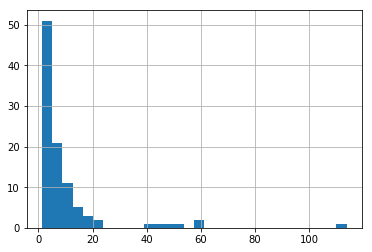

In [71]:
max_dim.hist(bins=30)

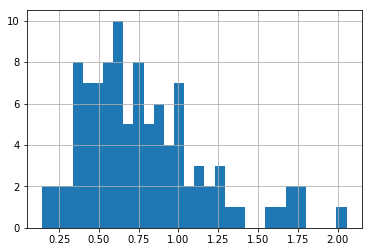

In [67]:
np.log10(max_dim).hist(bins=30)

In [79]:
loc_df.area_km2.describe(percentiles=[0.8, 0.9, 0.95])

count      100.000000
mean       275.172006
std       1318.676000
min          1.898558
50%         16.953859
80%         85.150811
90%        230.102730
95%       1604.434592
max      12605.276700
Name: area_km2, dtype: float64

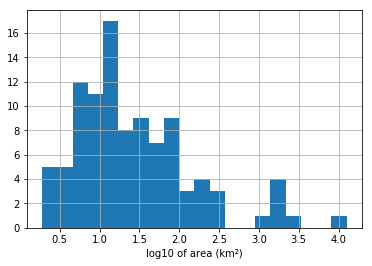

In [62]:
np.log10(loc_df.area).hist(bins=20)
plt.xlabel('log10 of area (km²)')